In [1]:
!pip install mp_api -q
!pip install --pre bibtexparser -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.0 requires pydantic!=1.8,!=1.8.1,<1.10.0,>=1.7.4, but you have pydantic 2.7.0 which is incompatible.
spacy 3.4.0 requires pydantic!=1.8,!=1.8.1,<1.10.0,>=1.7.4, but you have pydantic 2.7.0 which is incompatible.
gradient-utils 0.5.0 requires pymongo<4.0.0,>=3.11.0, but you have pymongo 4.6.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/notebooks/ranker/src/')


from get_from_mp_api import *

No module named 'phonopy'
No module named 'phonopy'


# Read in saved df here

In [3]:
def convert_to_list(string):
    if string.startswith('[') and string.endswith(']'):
        return eval(string)
    else:
        return string

main_df = pd.read_csv("df_full_flat_mat_info.csv", converters={'paper_titles': convert_to_list, 'flat_segments': convert_to_list})
main_df.set_index("material_id", inplace=True)
main_df.head()


,flat,flat_segments,formula,synth_score,Cluster_ID,cluster_size,sublattice_element,dbcv_cluster,probabilities,paper_titles,experimentally_observed,band_gap,synth_score_2,sub_lattice_structure
material_id,,,,,,,,,,,,,,
mp-7,True,[4],S,0.013924,-1,24875,S,0.846820,0.000000,"[The lattice of rhombohedral sulfur, The cryst...",True,2.2079,0.999939,"{'@module': 'pymatgen.core.structure', '@class..."
mp-25,True,[3],N2,0.127548,63,282,N,0.212178,0.104165,[Electron Diffraction and the Structure of alp...,True,7.3685,0.893845,"{'@module': 'pymatgen.core.structure', '@class..."
mp-35,True,"[1, 2, 3, 4]",Mn,0.007099,-1,24875,Mn,0.846820,0.000000,"[Crystal structure of alpha-manganese, Antifer...",True,0.0000,0.999977,"{'@module': 'pymatgen.core.structure', '@class..."
mp-43,True,"[1, 2, 3, 4]",U,0.001247,-1,24875,U,0.846820,0.000000,[The crystal structure of the beta phase of ur...,True,0.0000,1.000000,"{'@module': 'pymatgen.core.structure', '@class..."
mp-83,True,"[3, 4]",S,0.013924,38,22,S,0.468464,0.972129,[X-Ray Structure Analyses of Two Allotropes of...,True,2.5657,0.999928,"{'@module': 'pymatgen.core.structure', '@class..."


In [4]:
copy = main_df.copy()
copy.at["mp-7", "paper_titles"] = {2:"b"}
copy

,flat,flat_segments,formula,synth_score,Cluster_ID,cluster_size,sublattice_element,dbcv_cluster,probabilities,paper_titles,experimentally_observed,band_gap,synth_score_2,sub_lattice_structure
material_id,,,,,,,,,,,,,,
mp-7,True,[4],S,0.013924,-1,24875,S,0.846820,0.000000,{2: 'b'},True,2.2079,0.999939,"{'@module': 'pymatgen.core.structure', '@class..."
mp-25,True,[3],N2,0.127548,63,282,N,0.212178,0.104165,[Electron Diffraction and the Structure of alp...,True,7.3685,0.893845,"{'@module': 'pymatgen.core.structure', '@class..."
mp-35,True,"[1, 2, 3, 4]",Mn,0.007099,-1,24875,Mn,0.846820,0.000000,"[Crystal structure of alpha-manganese, Antifer...",True,0.0000,0.999977,"{'@module': 'pymatgen.core.structure', '@class..."
mp-43,True,"[1, 2, 3, 4]",U,0.001247,-1,24875,U,0.846820,0.000000,[The crystal structure of the beta phase of ur...,True,0.0000,1.000000,"{'@module': 'pymatgen.core.structure', '@class..."
mp-83,True,"[3, 4]",S,0.013924,38,22,S,0.468464,0.972129,[X-Ray Structure Analyses of Two Allotropes of...,True,2.5657,0.999928,"{'@module': 'pymatgen.core.structure', '@class..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-1443188,True,[4],ZnCuF4,0.574649,-1,24875,Cu,0.846820,0.000000,[],False,0.6531,0.982184,"{'@module': 'pymatgen.core.structure', '@class..."
mp-1443279,True,"[1, 3, 4]",Cr(OF)3,0.035679,-1,24875,F,0.846820,0.000000,[],False,0.4652,0.990963,"{'@module': 'pymatgen.core.structure', '@class..."
mp-1443442,True,"[3, 4]",VF5,0.727455,-1,24875,F,0.846820,0.000000,[],False,2.5453,0.992047,"{'@module': 'pymatgen.core.structure', '@class..."


# Find approximately matched superconducting structures
#### We mark if a material has been matched by the 3DSC paper to (usually additionally doped) entries in the SuperCon database
#### Then we count, for each cluster, how many of its members are materials which have been matched 

In [5]:
df_3DSC = pd.read_csv("csv_data/Superconductivity_3DSC_MP.csv", skiprows=1, usecols=['material_id_2', 'synth_doped', 'formula_sc', 'tc'])
df_3DSC.rename(columns={'material_id_2': "material_id", "synth_doped":"SC_doped_from_original", "formula_sc": "SC_formula"}, inplace=True)
df_3DSC.set_index("material_id", inplace=True)
# remove non-superconductors marked with T_c=0
df_3DSC = df_3DSC[df_3DSC['tc'] != 0]
#print(len(df_3DSC))
df_3DSC

,SC_formula,tc,SC_doped_from_original
material_id,,,
mp-978986,Ag0.02Ge2Pd1.98Sr1,2.640000,True
mp-1883,Ag0.15Sn0.85Te1,2.150000,True
mp-978986,Ag0.1Ge2Pd1.9Sr1,2.620000,True
mp-2597,Ag0.1In0.9Te1,1.200000,True
mp-7275,Ag0.2Ba1Si1.8,3.200000,True
...,...,...,...
mp-675,W2Zr1,1.080000,False
mp-21369,W3O1,1.675000,False
mp-79,Zn1,0.850800,False


In [6]:
len(np.unique(df_3DSC.index.to_numpy()))
np_IDs = df_3DSC.index.to_numpy(dtype=str)
print(len(np.unique(np_IDs)))
print(np.where(np.char.startswith(np.unique(np_IDs), 'v', start=1)))
#print(np.where(np.unique(df_3DSC.index.to_numpy())=="")

1524
(array([1522, 1523]),)


# % of all "flat-mats" which are SCs, without any triviality cuts

In [7]:
full_ids = pd.read_csv("csv_data/full_mp_id_list.csv")
full_ids.set_index("Column1", inplace=True)
full_ids_list = full_ids.index.to_numpy()
print(len(full_ids_list))
print(full_ids_list)

70451
['mp-1' 'mp-2' 'mp-3' ... 'mp-1504314' 'mp-1504391' 'mp-1504764']


In [8]:
print(len(main_df.index.unique()))
# Convert arrays to sets
#SCs = set(np.unique(df_3DSC[df_3DSC["SC_doped_from_original"]==False].index.to_numpy()))
SCs = set(np.unique(df_3DSC.index.to_numpy()))

print(len(SCs))
flat_mats = set(np.unique(main_df.index.to_numpy()))
full_ids = set(full_ids_list)

# Find the common elements using intersection
common_flat = SCs.intersection(flat_mats)
common_non_flat = SCs.intersection(full_ids.difference(flat_mats))
flat_check = full_ids.intersection(flat_mats)

# Find the number of common elements
num_common_elements = len(common_flat)
num_common_full = len(common_non_flat)

# print outputs
print("Number of flat materials also in 3DSC:", num_common_elements)
print("Number of 'non-flat' mats also in 3DSC:", num_common_full)
print("Number of flat mats:", len(flat_check))
print("These numbers don't add to the total matched in 3DSC (to mat proj) because not all mat project entries have band-structure data which is a requirement to be in our flat/not flat groups here")

33251
1524
Number of flat materials also in 3DSC: 148
Number of 'non-flat' mats also in 3DSC: 1113
Number of flat mats: 33251
These numbers don't add to the total matched in 3DSC (to mat proj) because not all mat project entries have band-structure data which is a requirement to be in our flat/not flat groups here


# SC %s for "non-insulating"(band_Gap<1eV cut applied) materials
#### also excluding doped cases

In [9]:
non_triv_df = main_df[main_df["band_gap"]<=1]

# Convert arrays to sets
# undoped SCs
#SCs = set(np.unique(df_3DSC[df_3DSC["SC_doped_from_original"]==False].index.to_numpy()))
SCs = set(np.unique(df_3DSC.index.to_numpy()))
# band gap <=1eV flat-mats
non_triv_flat_mats = set(np.unique(non_triv_df.index.to_numpy()))
# full mat id list
full_ids = set(full_ids_list)

# insulating + non-flat mat id list
triv_plus_non_flat = full_ids.difference(non_triv_flat_mats)

# Find the common elements using intersection
num_nontriv_flat_SC = len(SCs.intersection(non_triv_flat_mats))
num_trivial_or_non_flat_SC = len(SCs.intersection(triv_plus_non_flat))
flat_check = full_ids.intersection(flat_mats)

# print outputs
print(num_nontriv_flat_SC)
print(num_trivial_or_non_flat_SC)
#print("doped SC cases been removed: {0}".format())
print("% of SC non-triv flat mats:", (num_nontriv_flat_SC / len(non_triv_flat_mats))*100)
print("% of SC 'non-flat' or insulating mats:", (num_trivial_or_non_flat_SC / len(triv_plus_non_flat))*100)
print("Number of non-triv flat mats:", len(non_triv_flat_mats))
print(len(triv_plus_non_flat))

143
1118
% of SC non-triv flat mats: 0.8957093642342625
% of SC 'non-flat' or insulating mats: 2.0519032411995743
Number of non-triv flat mats: 15965
54486


#### save whether a material is SC matched

In [10]:
# Merge the two dataframes to see how many flat-band materials we have, have been matched with SuperCon database
df_matched_SCs = pd.merge(main_df, df_3DSC, left_index=True, right_index=True, how='inner')
print(len(np.unique(df_matched_SCs.index.to_list())))
#df_matched_SCs.head(20)

148


In [11]:
main_df["matched_to_a_sc"] = False
main_df["SC_doped_from_original"] = "n/a"
main_df.loc[df_matched_SCs.index, 'matched_to_a_sc'] = True

# CHECK THIS WORKS IN ORDER:
main_df.loc[df_matched_SCs.index, 'SC_doped_from_original'] = df_matched_SCs['SC_doped_from_original']

In [12]:
#main_df["SC_doped_from_original"]
df_matched = main_df[main_df["matched_to_a_sc"]]
df_matched["SC_doped_from_original"]

material_id
mp-243        False
mp-491         True
mp-607        False
mp-879        False
mp-1107       False
              ...  
mp-1207780    False
mp-1216453    False
mp-1216639     True
mp-1222913     True
mp-1225166    False
Name: SC_doped_from_original, Length: 148, dtype: object

# triviality metrics analysis - histograms for band gap and atomic distances (see where SCs fall)

In [79]:
def get_selection_cut_histograms_and_power(column, df_var, N_bins=20, ax=None):
    apply_density = True
    if not ax:
        fig, ax = plt.subplots()
        
    # range
    #ax.hist(df_var[column], bins=N_bins, range=(0,max(df_var[column])), density=apply_density, alpha=0.7, label="All Flat-Band Materials")
    ax.hist(df_var[column].to_list(), bins=N_bins, range=(0.9,1), density=apply_density, alpha=0.7, label="All Flat-Band Materials")
    #ax.hist(df_var[df_var["band_gap"]<=1][column], bins=N_bins, range=(0,max(df_var[column])), density=apply_density, alpha=0.7, label="All Flat-Band Materials")

    
    df_matched = df_var[df_var["matched_to_a_sc"]]

    #ax.hist(df_matched[column], bins=N_bins, range=(0,max(df_var[column])), density=apply_density, alpha=0.7, label="Matched to a SC")
    ax.hist(df_matched[column].to_list(), bins=N_bins, range=(0.9,1), density=apply_density, alpha=0.7, label="Matched to a SC")
    #ax.hist(df_matched[column]**2, bins=N_bins, range=(0.7,1), density=apply_density, alpha=0.7, label="Matched to a SC")
    
    #ax.hist(df_matched[[not x for x in df_matched["SC_doped_from_original"]]][column], bins=N_bins, range=(0,max(df_var[column])), density=apply_density, alpha=0.7, label="Matched to a SC non-doped")

    #no range
    #ax.hist(df_var[column], bins=N_bins, density=apply_density, alpha=0.7, label="All Flat-Band Materials")
    #ax.hist(df_var[df_var["matched_to_a_sc"]][column], bins=N_bins, density=apply_density, alpha=0.7, label="Matched to a SC")
    
    
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency Density")
    ax.legend()
    
    #cut_values = np.linspace(min(df_var[column]), max(df_var[column]), 100)
#     cut_values = np.linspace(0.2, 1, 100)
    
#     powers = np.zeros_like(cut_values)
    
#     for i, cut_value in enumerate(cut_values):
#         cut_mask = df_var[column]<cut_value
#         signal_to_noise_with_cut = df_var[cut_mask].matched_to_a_sc.sum() / cut_mask.sum()
#         signal_to_noise_without_cut = df_var.matched_to_a_sc.sum() / len(df_var)
        
#         powers[i] = signal_to_noise_with_cut / signal_to_noise_without_cut
        
    #ax.plot(cut_values, powers, label="Selection Cut Power")
    #ax.set_xlim(0,1)
    return ax

<AxesSubplot:xlabel='band_gap', ylabel='Frequency Density'>

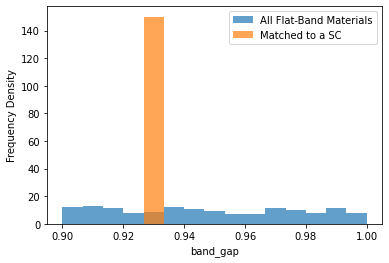

In [14]:
get_selection_cut_histograms_and_power("band_gap", main_df)

## # triviality metrics analysis - histograms for sublattice charge density overlap (see where SCs fall)

In [15]:
overlap_scores = pd.read_csv("csv_data/27k_partial_n_overlap_scores.csv")
overlap_scores.rename(columns={'Unnamed: 0': "material_id", 'score': 'charge_overlap_score'}, inplace=True)
overlap_scores.set_index("material_id", inplace=True)
# Merge the two dataframes, only keep mats for which we have overlap scores for which right now is not all of them
# is about 27k
df_with_overlaps = pd.merge(main_df, overlap_scores, left_index=True, right_index=True, how='inner')
df_with_overlaps.head()
#overlap_scores.head()


,flat,flat_segments,formula,synth_score,Cluster_ID,cluster_size,sublattice_element,dbcv_cluster,probabilities,paper_titles,experimentally_observed,band_gap,synth_score_2,sub_lattice_structure,matched_to_a_sc,SC_doped_from_original,charge_overlap_score
material_id,,,,,,,,,,,,,,,,,
mp-7,True,[4],S,0.013924,-1,24875,S,0.846820,0.000000,"[The lattice of rhombohedral sulfur, The cryst...",True,2.2079,0.999939,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.966837
mp-25,True,[3],N2,0.127548,63,282,N,0.212178,0.104165,[Electron Diffraction and the Structure of alp...,True,7.3685,0.893845,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.994282
mp-35,True,"[1, 2, 3, 4]",Mn,0.007099,-1,24875,Mn,0.846820,0.000000,"[Crystal structure of alpha-manganese, Antifer...",True,0.0000,0.999977,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.948875
mp-43,True,"[1, 2, 3, 4]",U,0.001247,-1,24875,U,0.846820,0.000000,[The crystal structure of the beta phase of ur...,True,0.0000,1.000000,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.979028
mp-83,True,"[3, 4]",S,0.013924,38,22,S,0.468464,0.972129,[X-Ray Structure Analyses of Two Allotropes of...,True,2.5657,0.999928,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.962037


<AxesSubplot:xlabel='charge_overlap_score', ylabel='Frequency Density'>

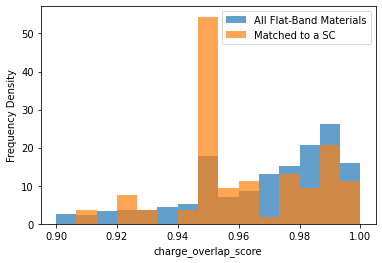

In [16]:
get_selection_cut_histograms_and_power("charge_overlap_score", df_with_overlaps)

In [17]:
overlap_cutoff = 0.96

temp_df = df_with_overlaps[df_with_overlaps["band_gap"]<=1]
high_overlap_df = temp_df[temp_df["charge_overlap_score"]<=overlap_cutoff]
# Convert arrays to sets
# undoped SCs
#SCs = set(np.unique(df_3DSC[df_3DSC["SC_doped_from_original"]==False].index.to_numpy()))
SCs = set(np.unique(df_3DSC.index.to_numpy()))
# band gap <=1eV flat-mats
non_triv_flat_mats = set(np.unique(high_overlap_df.index.to_numpy()))
# full mat id list
full_ids = set(full_ids_list)

# insulating + non-flat mat id list
triv_plus_non_flat = full_ids.difference(non_triv_flat_mats)

# Find the common elements using intersection
num_nontriv_flat_SC = len(SCs.intersection(non_triv_flat_mats))
num_trivial_or_non_flat_SC = len(SCs.intersection(triv_plus_non_flat))
flat_check = full_ids.intersection(flat_mats)

# print outputs
print(num_nontriv_flat_SC)
print(num_trivial_or_non_flat_SC)
#print("doped SC cases been removed: {0}".format())
print("% of SC non-triv flat mats:", (num_nontriv_flat_SC / len(non_triv_flat_mats))*100)
print("% of SC 'non-flat' or insulating mats:", (num_trivial_or_non_flat_SC / len(triv_plus_non_flat))*100)
print("Number of non-triv flat mats:", len(non_triv_flat_mats))
print(len(triv_plus_non_flat))

77
1184
% of SC non-triv flat mats: 1.2029370410873301
% of SC 'non-flat' or insulating mats: 1.8485558157689306
Number of non-triv flat mats: 6401
64050


# Full path number density drop metric

In [69]:
#drop_scores = pd.read_csv("csv_data/partial_connectivity_metric_data/sec1_drop_values.csv")
drop_scores = pd.read_csv("csv_data/partial_connectivity_metric_data/sub_only_drop_values_1.csv")

drop_scores.rename(columns={'mat_id': "material_id"}, inplace=True)
drop_scores.set_index("material_id", inplace=True)
drop_scores = drop_scores[drop_scores["av_drop"]>=0]

#drop_scores_2 = pd.read_csv("csv_data/partial_connectivity_metric_data/sec2_folder_drop_values.csv")
drop_scores_2 = pd.read_csv("csv_data/partial_connectivity_metric_data/sub_only_drop_values_2.csv")

drop_scores_2.rename(columns={'mat_id': "material_id"}, inplace=True)
drop_scores_2.set_index("material_id", inplace=True)
drop_scores_2 = drop_scores_2[drop_scores_2["av_drop"]>=0]

comb = pd.concat([drop_scores_2, drop_scores])
# Merge the two dataframes, only keep mats for which we have overlap scores for which right now is not all of them
# is about 27k
df_with_drops = pd.merge(main_df, comb, left_index=True, right_index=True, how='inner')
df_with_drops.head()
#comb.head()
df_with_drops.loc["mp-35"]
#print(len(np.unique(df_with_drops.index)))
print(len(df_with_drops.index.to_list()))
print(len(np.unique(df_with_drops.index.to_list())))

10798
10798


/tmp/ipykernel_83/2386126057.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where([df_with_drops["av_drop"]==1]==True)


(array([], dtype=int64),)

In [ ]:
def below_fermi(arr):
    for num in arr:
        if num == 3 or num == 4:
            return True
    return False

In [55]:
below_fermi([1,3,4])

True

In [21]:
df_with_drops.head()

,flat,flat_segments,formula,synth_score,Cluster_ID,cluster_size,sublattice_element,dbcv_cluster,probabilities,paper_titles,experimentally_observed,band_gap,synth_score_2,sub_lattice_structure,matched_to_a_sc,SC_doped_from_original,av_drop,max_drop,min_drop
material_id,,,,,,,,,,,,,,,,,,,
mp-35,True,"[1, 2, 3, 4]",Mn,0.007099,-1,24875,Mn,0.846820,0.000000,"[Crystal structure of alpha-manganese, Antifer...",True,0.0000,0.999977,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.986371,0.986371,0.986371
mp-43,True,"[1, 2, 3, 4]",U,0.001247,-1,24875,U,0.846820,0.000000,[The crystal structure of the beta phase of ur...,True,0.0000,1.000000,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.799448,0.911079,0.687396
mp-172,True,"[3, 4]",Nd5Ge4,0.437794,31,43,Nd,0.538096,0.945456,[The magnetic structures of Nd5 Si4 and Nd5 Ge...,True,0.0000,1.000000,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.833162,0.975467,0.563659
mp-226,True,[3],FeS2,0.034143,-1,24875,Fe,0.846820,0.000000,[Redetermined crystal structure of Fe S2 (pyri...,True,0.4572,0.857109,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.978887,0.980023,0.978262
mp-287,True,"[1, 2, 3]",UF4,0.491048,-1,24875,U,0.846820,0.000000,[Temperature variation of the structural param...,True,0.0000,0.975453,"{'@module': 'pymatgen.core.structure', '@class...",False,n/a,0.985887,0.998853,0.979363


In [ ]:
print(len(df_with_drops[df_with_drops["matched_to_a_sc"]]))

133


<AxesSubplot:xlabel='av_drop', ylabel='Frequency Density'>

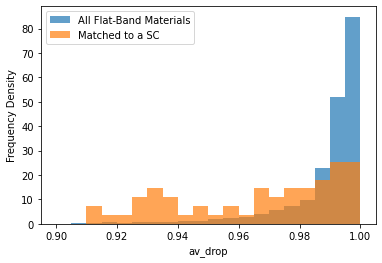

In [80]:
#df_with_drops = df_with_drops[df_with_drops["band_gap"]<=1]
# remove materials with no flat band below E_fermi
#df_with_drops["flat_band_below_Ef"] = df_with_drops["flat_segments"].apply(below_fermi)
#df_below_Ef = df_with_drops[df_with_drops["flat_band_below_Ef"]]

#get_selection_cut_histograms_and_power("av_drop", df_below_Ef)
df_with_drops["half_av"] = (df_with_drops["max_drop"]+df_with_drops["min_drop"])/2
get_selection_cut_histograms_and_power("av_drop", df_with_drops)

In [76]:
overlap_cutoff = 0.98

temp_df = df_with_drops[df_with_drops["band_gap"]<=1]
#temp_df = df_with_drops

high_overlap_df = temp_df[temp_df["av_drop"]<=overlap_cutoff]
# Convert arrays to sets
# undoped SCs
#SCs = set(np.unique(df_3DSC[df_3DSC["SC_doped_from_original"]==False].index.to_numpy()))
SCs = set(np.unique(df_3DSC.index.to_numpy()))
# band gap <=1eV flat-mats
non_triv_flat_mats = set(np.unique(high_overlap_df.index.to_numpy()))
# full mat id list
full_ids = set(full_ids_list)

# insulating + non-flat mat id list
triv_plus_non_flat = full_ids.difference(non_triv_flat_mats)

# Find the common elements using intersection
num_nontriv_flat_SC = len(SCs.intersection(non_triv_flat_mats))
num_trivial_or_non_flat_SC = len(SCs.intersection(triv_plus_non_flat))
flat_check = full_ids.intersection(flat_mats)

# print outputs
print("Number of non-triv flat mats:", len(non_triv_flat_mats))
print("Number of trivial flat-band + non-flat-band mats:", len(triv_plus_non_flat))

print("number of 'non-trivial' flat-band SCs: ", num_nontriv_flat_SC)
print("number of 'trivial' or non-flat-band SCs: ", num_trivial_or_non_flat_SC)
#print("doped SC cases been removed: {0}".format())
print("% of SC non-triv flat mats:", (num_nontriv_flat_SC / len(non_triv_flat_mats))*100)
print("% of SC 'non-flat' or insulating mats:", (num_trivial_or_non_flat_SC / len(triv_plus_non_flat))*100)


Number of non-triv flat mats: 1967
Number of trivial flat-band + non-flat-band mats: 68484
number of 'non-trivial' flat-band SCs:  42
number of 'trivial' or non-flat-band SCs:  1219
% of SC non-triv flat mats: 2.135231316725979
% of SC 'non-flat' or insulating mats: 1.7799778050347528


## Analyse atomic distances in flat-band sublattice (as determined by Anupam)

In [17]:
main_df["sub_lattice_structure"].to_list()[0]

"{'@module': 'pymatgen.core.structure', '@class': 'Structure', 'charge': 0, 'lattice': {'matrix': [[5.83749204, 0.06254491, -2.71890814], [-4.28350897, 3.9662647, -2.71900595], [0.02407769, 0.0625842, 6.43958097]], 'pbc': (True, True, True), 'a': 6.439929087854037, 'b': 6.439929978087647, 'c': 6.43993009173481, 'alpha': 114.75185786877043, 'beta': 114.75184782858017, 'gamma': 114.75183455160276, 'volume': 152.79889506945906}, 'properties': {}, 'sites': [{'species': [{'element': 'S', 'occu': 1}], 'abc': [0.24492283, 0.14077002, 0.90933939], 'xyz': [0.848640219099403, 0.6305601157552272, 4.807087432994953], 'properties': {'magmom': -0.0}, 'label': 'S'}, {'species': [{'element': 'S', 'occu': 1}], 'abc': [0.90933939, 0.24492283, 0.14077002], 'xyz': [4.262521728423524, 1.0371133042457898, -2.231856959615954], 'properties': {'magmom': -0.0}, 'label': 'S'}, {'species': [{'element': 'S', 'occu': 1}], 'abc': [0.14077002, 0.90933939, 0.24492283], 'xyz': [-3.067522386644024, 3.6308134704854167, -

In [20]:
# ADD LARGEST UNIT VECT TO DF - this shows a general way to add any structure info as a new column
def return_max_sublattice_vector(structure_dict):
    return max([structure_dict['lattice'][key] for key in ['a', 'b', 'c']])
def convert_string_to_dict(string_dict):
    return eval(string_dict)

def return_density(structure_dict):
    vectors = structure_dict['lattice']['matrix']
    a,b,c = vectors[0],vectors[1],vectors[2]
    volume = abs(np.dot(a,np.cross(b,c)))
    
    num_sites = len(structure_dict['sites'])
    
    return num_sites / volume 

In [22]:
main_df["sub_lattice_structure"] = main_df["sub_lattice_structure"].apply(convert_string_to_dict)
main_df["max_sub_unit_vector"] = main_df["sub_lattice_structure"].apply(return_max_sublattice_vector)

In [23]:
main_df["unit_cell_num_density"] = main_df["sub_lattice_structure"].apply(return_density)

In [ ]:
get_selection_cut_histograms_and_power("unit_cell_num_density")
#plt.xlim([0,30])
#plt.ylim([0,0.5])

## Location of Flat Bands

In [94]:
def flat_below_fermi(flat_segments_list):
    return  (3 not in flat_segments_list) and (4 not in flat_segments_list)

In [90]:
flat_below_fermi_mask = main_df.flat_segments.apply(flat_below_fermi)

In [119]:
# get number of flat-below-fermi materials linked to a SC
num_below = flat_below_fermi_mask.sum()
below_sc_fraction = main_df[flat_below_fermi_mask].matched_to_a_sc.sum()/num_below
print("total # flat band materials:", len(main_df))
print("superconducting fraction (including doped and non-doped):", main_df.matched_to_a_sc.sum()/len(main_df))
print()

num_below = flat_below_fermi_mask.sum()
below_sc_fraction = main_df[flat_below_fermi_mask].matched_to_a_sc.sum()/num_below
print("# flat band materials which only have flat bands below the fermi level: ", num_below)
print("superconducting fraction:", below_sc_fraction)
print()

num_above = len(flat_below_fermi_mask)-num_below
above_sc_fraction = main_df[~flat_below_fermi_mask].matched_to_a_sc.sum()/num_above
print("# flat band materials which DON'T only have flat bands below the fermi level: ", num_above)
print("superconducting fraction:", above_sc_fraction)
print()
print("Ratio of fractions:", below_sc_fraction/above_sc_fraction)

total # flat band materials: 33251
superconducting fraction: 0.004450993955069021

# flat band materials which only have flat bands below the fermi level:  10065
superconducting fraction: 0.00894187779433681

# flat band materials which DON'T only have flat bands below the fermi level:  23186
superconducting fraction: 0.002501509531613905

Ratio of fractions: 3.5745927334395393


# SC overlap with structure clusters

In [29]:
num_sc_in_cluster = main_df["matched_to_a_sc"].groupby(main_df["Cluster_ID"]).sum()

In [30]:
frac = num_sc_in_cluster / main_df["matched_to_a_sc"].groupby(main_df["Cluster_ID"]).count()
frac.sort_values(ascending=False)

Cluster_ID
90     0.333333
114    0.125000
36     0.107143
76     0.105263
131    0.090909
         ...   
65     0.000000
67     0.000000
68     0.000000
69     0.000000
177    0.000000
Name: matched_to_a_sc, Length: 179, dtype: float64

In [31]:
main_df["num_sc_in_cluster"] = main_df["Cluster_ID"].map(num_sc_in_cluster)
main_df["fraction_sc_in_cluster"] = main_df["num_sc_in_cluster"]/main_df["cluster_size"]

In [32]:
#main_df["fraction_sc_in_cluster"]
df_sorted = main_df.sort_values(by='fraction_sc_in_cluster', ascending=False)
#df_sorted[df_sorted["experimentally_observed"]==False]
# Found a cluster with 1/3 matched superconductors ! CLUSTER ID: 90
# 114, 
#fraction[fraction==1/3]
main_df[main_df["Cluster_ID"]==131].head()
#df_sorted

,flat,flat_segments,formula,synth_score,Cluster_ID,cluster_size,sublattice_element,dbcv_cluster,probabilities,paper_titles,experimentally_observed,band_gap,synth_score_2,matched_to_a_sc,SC_doped_from_original,num_sc_in_cluster,fraction_sc_in_cluster
material_id,,,,,,,,,,,,,,,,,
mp-3402,True,"[1, 2]",UTeN,0.252096,131,22,U,0.708989,1.000000,"[X-ray investigations in the system U-N-Te, He...",True,0.0,1.000000,False,n/a,2,0.090909
mp-20370,True,"[1, 2]",UCuPO,0.012989,131,22,U,0.708989,0.950870,[Crystal structure and physical properties of ...,True,0.0,0.999525,False,n/a,2,0.090909
mp-21372,True,"[1, 2]",CePRuO,0.003077,131,22,Ce,0.708989,1.000000,[The rare earth transition metal phosphide oxi...,True,0.0,0.980762,False,n/a,2,0.090909
mp-22620,True,"[1, 2]",CeZnSbO,0.086740,131,22,Ce,0.708989,0.938057,[Quaternary equiatomic compounds Ln Zn Sb O (L...,True,0.0,0.999994,False,n/a,2,0.090909
mp-27762,True,"[2, 3]",UBrN,0.068888,131,22,U,0.708989,1.000000,"[Ueber Uran-Nitrid-Chlorid, -Bromid und -Jodid]",True,0.0,0.999993,False,n/a,2,0.090909
